## Objectives
#### 1. Airline vs Price Analysis
#### 2. Perform Total_Stops vs Price Analysis
#### 3. Source vs Price

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_cleaned.csv')

In [5]:
df.sample(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_time_hour,dep_time_min,arrival_time_hour,arrival_time_min,Duration_hours,Duration_mins
5006,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,1,No info,14781,5,6,8,25,19,50,11,25
8277,Air India,Mumbai,Hyderabad,BOM → JAI → DEL → HYD,2,No info,17926,3,6,11,35,19,25,31,50
9004,SpiceJet,Banglore,Delhi,BLR → DEL,0,No info,4423,5,1,9,30,12,20,2,50
6798,Air India,Banglore,New Delhi,BLR → DEL,0,No info,7486,24,3,17,0,19,45,2,45
4254,Air India,Kolkata,Banglore,CCU → BBI → BOM → BLR,2,No info,10151,6,9,12,0,18,30,30,30


## 1. Airline vs Price Analysis

In [11]:
a_vs_p = df.groupby('Airline')['Price'].mean().reset_index()
a_vs_p

,Airline,Price
0,Air Asia,5590.260188
1,Air India,9464.271313
2,GoAir,5861.056701
3,IndiGo,5673.682903
4,Jet Airways,11360.318722
5,Multiple carriers,10750.907251
6,Multiple carriers Premium economy,11418.846154
7,SpiceJet,4315.116279
8,Trujet,4140.000000
9,Vistara,7796.348643


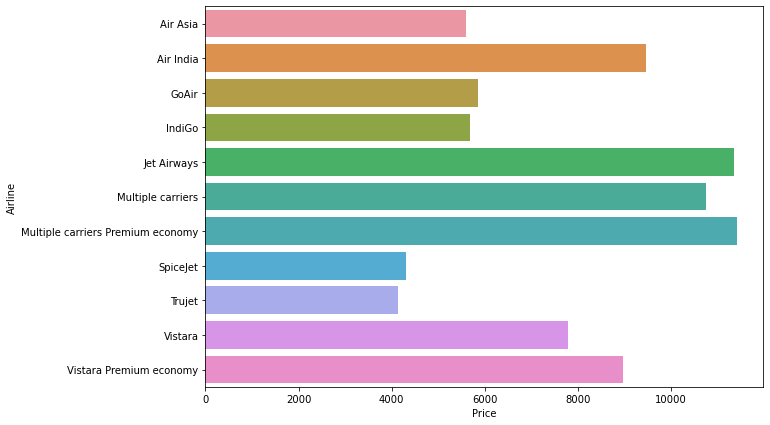

In [17]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Price' , y = 'Airline' , data = a_vs_p)
plt.show()

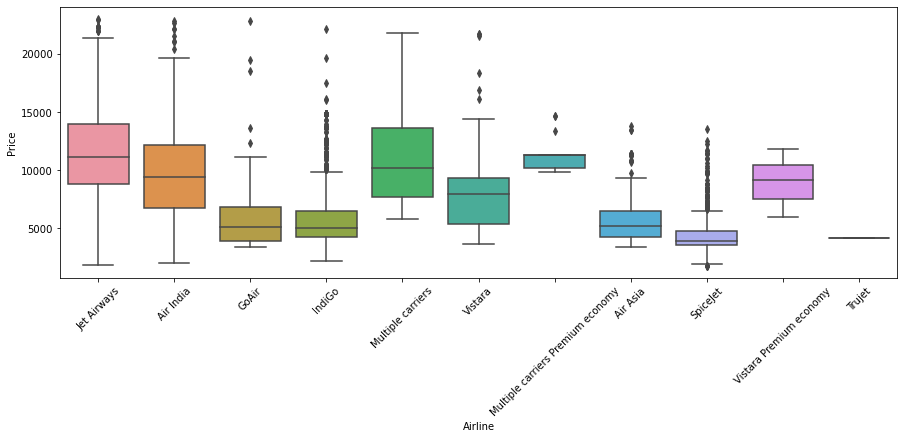

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation = 45)
plt.show()

## 2. Total_Stops vs Price Analysis

In [29]:
ts_vs_p = df.groupby('Total_Stops')['Price'].mean().reset_index()
ts_vs_p

,Total_Stops,Price
0,0,5005.265482
1,1,10322.241081
2,2,12536.788564
3,3,13112.000000
4,4,17686.000000


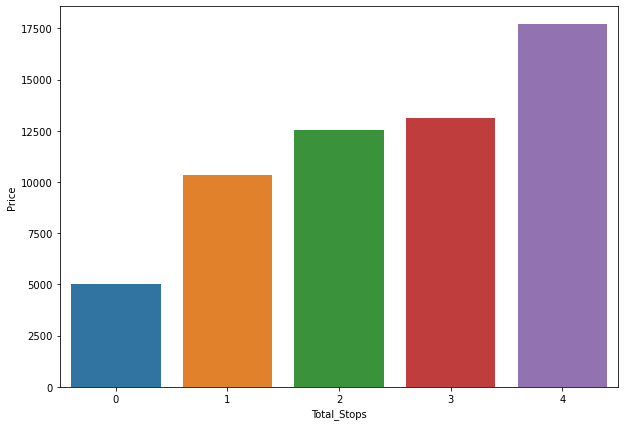

In [30]:
plt.figure(figsize = (10,7))
sns.barplot(y = 'Price' , x = 'Total_Stops' , data = ts_vs_p)
plt.show()

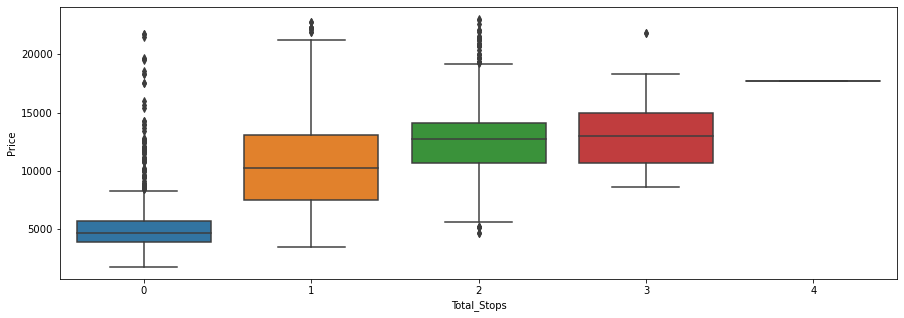

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=df.sort_values('Price',ascending=False) )
plt.show()

## 3. Source vs Price

In [31]:
s_vs_p = df.groupby('Source')['Price'].mean().reset_index().sort_values(by = 'Price' , ascending = False)
s_vs_p

,Source,Price
0,Banglore,7248.111059
1,Chennai,4789.892388
2,Delhi,10467.942920
3,Kolkata,9150.449826
4,Mumbai,4921.650289


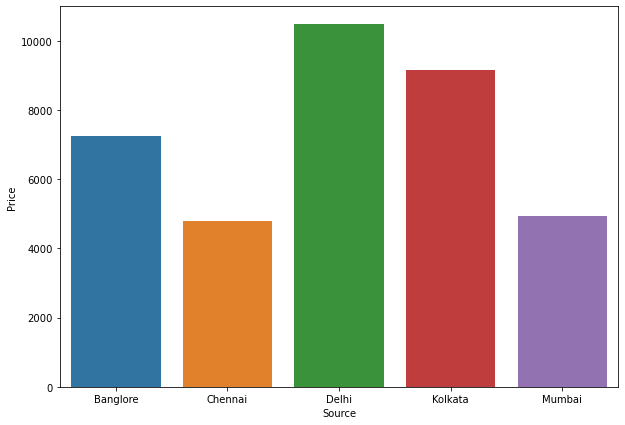

In [32]:
plt.figure(figsize = (10,7))
sns.barplot(y = 'Price' , x = 'Source' , data = s_vs_p)
plt.show()

<Figure size 1080x360 with 0 Axes>

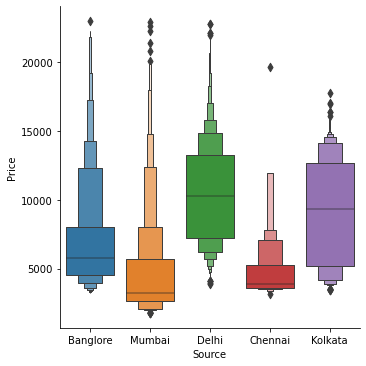

In [37]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.show()

## 4. Co-relation

<AxesSubplot:>

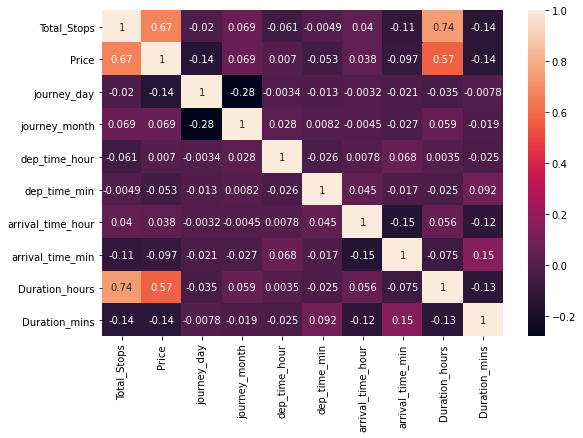

In [48]:
plt.figure(figsize = (9,6))
sns.heatmap(df.corr(),annot = True)

In [42]:
cor = df.corr()['Price'].sort_values(ascending = False)[1:].reset_index()

Duration_hours and total_stops are co-related so thus will occur multi-collinearity issue so i will remove duration hour column